# Jinteki.net Game Log Analysis

Import useful packages

In [1]:
import Pkg; 
Pkg.add("StatsPlots"); 
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("DataFramesMeta");
Pkg.add("StatsBase");

using StatsBase;
using CSV;
using DataFrames;
using DataFramesMeta;
using StatsPlots;

   Updating registry at `/opt/julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed Qt_jll ─────────────────────── v5.15.2+1
  Installed Libiconv_jll ───────────────── v1.16.0+7
  Installed Wayland_protocols_jll ──────── v1.18.0+4
  Installed IteratorInterfaceExtensions ── v1.0.0
  Installed StatsPlots ─────────────────── v0.14.17
  Installed PDMats ─────────────────────── v0.10.1
  Installed GeometryBasics ─────────────── v0.3.8
  Installed Colors ─────────────────────── v0.12.6
  Installed LibVPX_jll ─────────────────── v1.9.0+1
  Installed libvorbis_jll ──────────────── v1.3.6+6
  Installed OrderedCollections ─────────── v1.3.3
  Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
  Installed Ogg_jll ────────────────────── v1.3.4+2
  Installed Adapt ──────────────────────── v3.2.0
  Installed Tables ─────────────────────── v1.3.1
  Installed Formatting ─────────────────── v0.4.2
  Installe

## Load the data

In [41]:
df = DataFrame(CSV.File("20210206_games.csv"))

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String,String,String?,String?,String?
1,20210204,0,missing,casual,standard,missing,missing,Cybernetics Division: Humanity Upgraded
2,20210204,0,missing,casual,standard,missing,missing,Seidr Laboratories: Destiny Defined
3,20210204,1,missing,casual,standard,missing,missing,Jinteki: Replicating Perfection
4,20210204,3,missing,casual,standard,missing,missing,Jinteki: Personal Evolution
5,20210204,4,missing,casual,standard,missing,missing,Weyland Consortium: Builder of Nations
6,20210204,5,missing,casual,standard,missing,missing,Jinteki: Replicating Perfection
7,20210204,7,11,casual,standard,corp,Agenda,Weyland Consortium: Building a Better World
8,20210204,9,missing,casual,standard,missing,missing,Sportsmetal: Go Big or Go Home
9,20210204,10,missing,casual,standard,missing,missing,Titan Transnational: Investing In Your Future


In [42]:
size(df)

(32452, 9)

In [43]:
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,date,2.02078e7,20201218,2.02101e7,20210204
2,time,94.5728,0,18.0,68879
3,turn,12.2668,0,12.0,49
4,room,,casual,,competitive
5,format,,casual,,standard
6,winner,,corp,,runner
7,reason,,Agenda,,Flatline
8,corp,,Acme Consulting: The Truth You Need,,Weyland Consortium: Building a Better World
9,runner,,419: Amoral Scammer,,Whizzard: Master Gamer


In [9]:
last(df, 5)

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64?,String,String,String?,String?,String?
1,20201218,42,11,casual,standard,corp,Flatline,Blue Sun: Powering the Future
2,20201218,3,2,casual,standard,corp,Concede,Jinteki: Replicating Perfection
3,20201218,31,18,casual,standard,runner,Agenda,NBN: Controlling the Message
4,20201218,0,0,casual,standard,runner,Decked,missing
5,20201218,29,14,casual,standard,corp,Agenda,Blue Sun: Powering the Future


In [10]:
missing_corp = length(findall(x -> ismissing(x), df.corp))

258

In [11]:
missing_runner = length(findall(x -> ismissing(x), df.runner))

378

In [12]:
no_winner = length(findall(x -> ismissing(x), df.winner))

1942

In [13]:
complete = df[completecases(df), :]
disallowmissing!(complete)
size(complete)

(30208, 9)

# Game Length

In [17]:
describe(complete.turn)

Summary Stats:
Length:         30208
Missing Count:  0
Mean:           12.794657
Minimum:        0.000000
1st Quartile:   9.000000
Median:         13.000000
3rd Quartile:   16.000000
Maximum:        49.000000
Type:           Int64


In [18]:
zero_turns = length(findall(x -> x === 0, complete.turn))

179

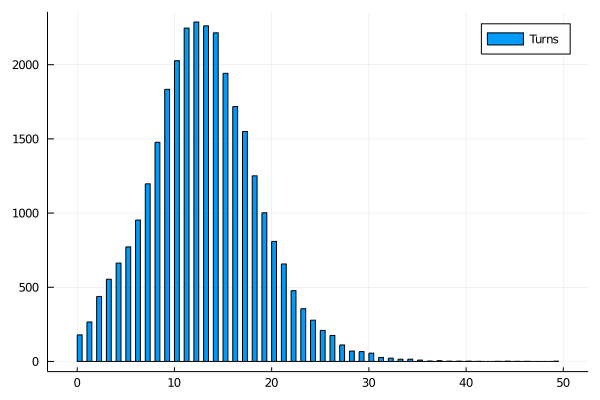

In [19]:
histogram(complete.turn, label="Turns")

In [20]:
describe(complete.time)

Summary Stats:
Length:         30208
Missing Count:  0
Mean:           24.519829
Minimum:        0.000000
1st Quartile:   11.000000
Median:         19.000000
3rd Quartile:   31.000000
Maximum:        357.000000
Type:           Int64


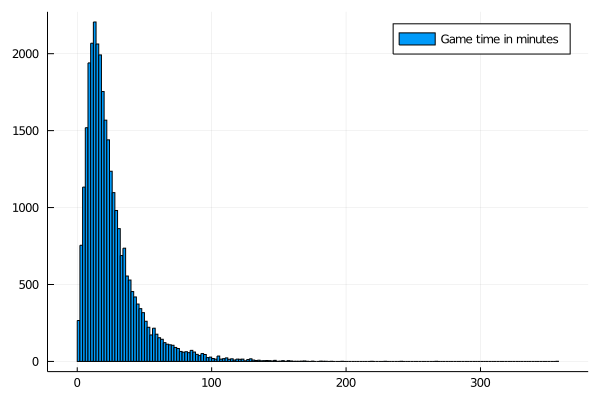

In [21]:
histogram(complete.time, label="Game time in minutes")

In [22]:
with_time_no_max = @where(complete, :time .<= 120, :time .>= 2, :turn .!= 0)
describe(with_time_no_max.time)

Summary Stats:
Length:         29756
Missing Count:  0
Mean:           24.160573
Minimum:        2.000000
1st Quartile:   12.000000
Median:         19.000000
3rd Quartile:   31.000000
Maximum:        120.000000
Type:           Int64


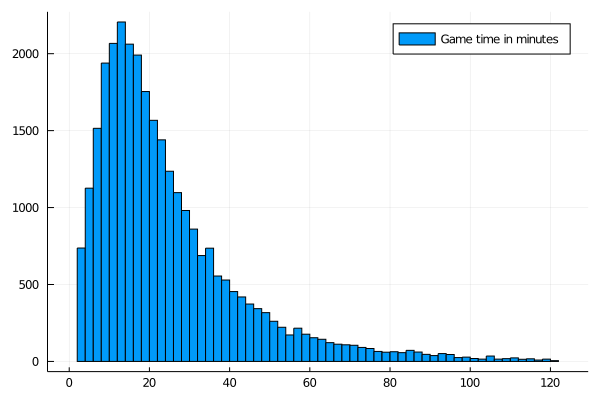

In [23]:
histogram(with_time_no_max.time, label="Game time in minutes")

# Game Outcomes

In [24]:
t0_concede = @where(complete, :turn .== 0, :reason .== "Concede")
size(t0_concede)

(178, 9)

In [25]:
t1_concede = @where(complete, :turn .== 1, :reason == "Concede")

,date,time,turn,room,format,winner,reason,corp,runner
,Int64,Int64,Int64,String,String,String,String,String,String


In [26]:
t0_runner_concede = @where(t0_concede, :winner .== "corp")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210204,7,0,casual,core-experience,corp,Concede,Blue Sun: Powering the Future
2,20210204,0,0,casual,standard,corp,Concede,Jinteki: Replicating Perfection
3,20210203,1,0,casual,standard,corp,Concede,Jinteki: Replicating Perfection
4,20210203,1,0,casual,standard,corp,Concede,NBN: Controlling the Message
5,20210202,2,0,casual,standard,corp,Concede,Sportsmetal: Go Big or Go Home
6,20210202,0,0,casual,standard,corp,Concede,Jinteki: Replicating Perfection
7,20210201,0,0,casual,standard,corp,Concede,NBN: Controlling the Message
8,20210131,1,0,casual,eternal,corp,Concede,Acme Consulting: The Truth You Need
9,20210129,1,0,casual,casual,corp,Concede,Jinteki: Personal Evolution


In [27]:
rc = countmap(t0_runner_concede.corp)
reverse(sort(collect(rc), by=x->x[2]))

24-element Array{Pair{String,Int64},1}:
                  "NBN: Controlling the Message" => 22
               "Jinteki: Replicating Perfection" => 12
                   "Jinteki: Personal Evolution" => 7
                "Sportsmetal: Go Big or Go Home" => 7
   "Weyland Consortium: Building a Better World" => 4
         "The Outfit: Family Owned and Operated" => 3
           "Acme Consulting: The Truth You Need" => 3
          "Haas-Bioroid: Engineering the Future" => 3
        "Weyland Consortium: Builder of Nations" => 3
            "Hyoubu Institute: Absolute Clarity" => 3
                      "NBN: The World is Yours*" => 2
                 "Blue Sun: Powering the Future" => 2
         "Argus Security: Protection Guaranteed" => 2
              "Near-Earth Hub: Broadcast Center" => 2
              "Pālanā Foods: Sustainable Growth" => 2
         "Asa Group: Security Through Vigilance" => 2
          "Haas-Bioroid: Architects of Tomorrow" => 2
               "Earth Station: SEA Headq

In [28]:
t0_corp_concede = @where(t0_concede, :winner .== "runner")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210204,1,0,casual,standard,runner,Concede,NBN: Controlling the Message
2,20210204,1,0,casual,casual,runner,Concede,Acme Consulting: The Truth You Need
3,20210203,1,0,casual,standard,runner,Concede,Jinteki: Personal Evolution
4,20210203,1,0,casual,standard,runner,Concede,MirrorMorph: Endless Iteration
5,20210202,0,0,casual,standard,runner,Concede,Blue Sun: Powering the Future
6,20210202,0,0,casual,standard,runner,Concede,Haarpsichord Studios: Entertainment Unleashed
7,20210202,2,0,casual,standard,runner,Concede,Haas-Bioroid: Stronger Together
8,20210131,1,0,competitive,standard,runner,Concede,Pālanā Foods: Sustainable Growth
9,20210130,2,0,casual,standard,runner,Concede,Acme Consulting: The Truth You Need


In [29]:
cc = countmap(t0_corp_concede.runner)
reverse(sort(collect(cc), by=x->x[2]))

28-element Array{Pair{String,Int64},1}:
          "Hayley Kaplan: Universal Scholar" => 14
           "Leela Patel: Trained Pragmatist" => 11
                       "419: Amoral Scammer" => 9
                  "Chaos Theory: Wünderkind" => 7
 "Gabriel Santiago: Consummate Professional" => 6
               "Reina Roja: Freedom Fighter" => 6
              "Noise: Hacker Extraordinaire" => 5
         "Sunny Lebeau: Security Specialist" => 4
        "Rielle \"Kit\" Peddler: Transhuman" => 4
         "Hoshiko Shiro: Untold Protagonist" => 2
 "Ele \"Smoke\" Scovak: Cynosure of the Net" => 2
             "Edward Kim: Humanity's Hammer" => 2
         "Freedom Khumalo: Crypto-Anarchist" => 2
                                             ⋮
  "Ken \"Express\" Tenma: Disappeared Clone" => 1
             "Alice Merchant: Clan Agitator" => 1
            "Andromeda: Dispossessed Ristie" => 1
                    "Akiko Nisei: Head Case" => 1
        "Kabonesa Wu: Netspace Thrillseeker" => 1
           

In [30]:
countmap(complete.winner)

Dict{String,Int64} with 2 entries:
  "runner" => 13100
  "corp"   => 17108

In [31]:
countmap(complete.reason)

Dict{String,Int64} with 4 entries:
  "Flatline" => 5225
  "Decked"   => 143
  "Concede"  => 6352
  "Agenda"   => 18488

In [32]:
no_concedes = @where(complete, :reason .!= "Concede")
size(no_concedes)

(23856, 9)

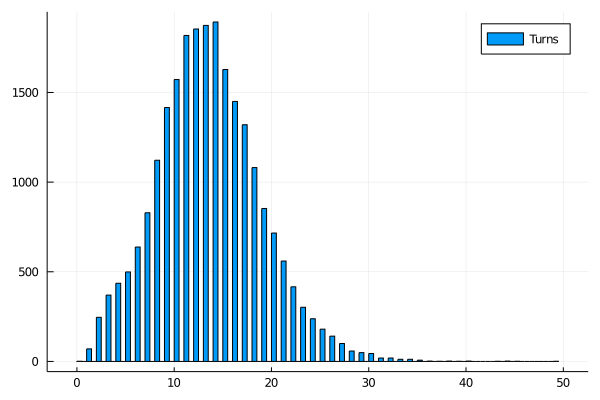

In [33]:
histogram(no_concedes.turn, label="Turns")

In [34]:
describe(no_concedes.turn)

Summary Stats:
Length:         23856
Missing Count:  0
Mean:           13.317949
Minimum:        0.000000
1st Quartile:   10.000000
Median:         13.000000
3rd Quartile:   17.000000
Maximum:        49.000000
Type:           Int64


In [35]:
long_game = @where(complete, :turn .=== 49)

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210109,83,49,casual,standard,runner,Concede,NBN: Controlling the Message
2,20201220,46,49,casual,standard,runner,Agenda,NBN: Controlling the Message


In [36]:
long_game[:, [:turn, :winner, :reason, :corp, :runner]]

,turn,winner,reason,corp,runner
,Int64,String,String,String,String
1,49,runner,Concede,NBN: Controlling the Message,"Rielle ""Kit"" Peddler: Transhuman"
2,49,runner,Agenda,NBN: Controlling the Message,Leela Patel: Trained Pragmatist


In [37]:
concedes = @where(complete, :reason .== "Concede")

,date,time,turn,room,format,winner,reason,corp
,Int64,Int64,Int64,String,String,String,String,String
1,20210204,7,8,casual,standard,corp,Concede,Sportsmetal: Go Big or Go Home
2,20210204,4,2,casual,standard,corp,Concede,Spark Agency: Worldswide Reach
3,20210204,20,24,casual,standard,corp,Concede,Jinteki: Replicating Perfection
4,20210204,11,2,casual,standard,runner,Concede,Tennin Institute: The Secrets Within
5,20210204,24,18,casual,standard,corp,Concede,Jinteki: Personal Evolution
6,20210204,10,10,casual,standard,corp,Concede,Weyland Consortium: Building a Better World
7,20210204,25,15,casual,standard,runner,Concede,AgInfusion: New Miracles for a New World
8,20210204,14,9,casual,standard,corp,Concede,Jinteki: Replicating Perfection
9,20210204,5,5,casual,standard,corp,Concede,Jinteki: Replicating Perfection


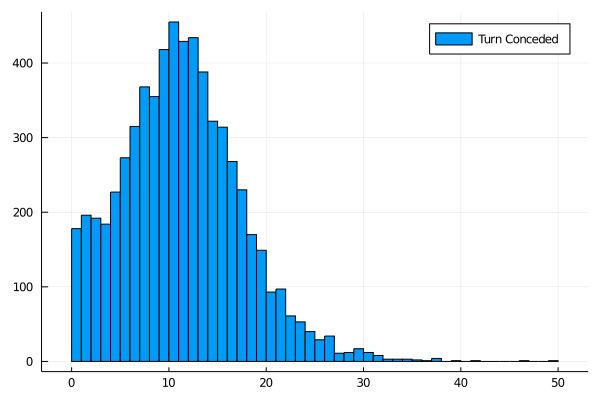

In [38]:
histogram(concedes.turn, label="Turn Conceded")

In [40]:
format_count = countmap(complete.format)

Dict{String,Int64} with 7 entries:
  "classic"         => 85
  "snapshot-plus"   => 44
  "casual"          => 2069
  "standard"        => 26594
  "core-experience" => 813
  "eternal"         => 575
  "snapshot"        => 28